In [26]:
import cv2
import matplotlib.pyplot as p
import matplotlib.cm as cm
import numpy as np
from scipy import signal

Q1

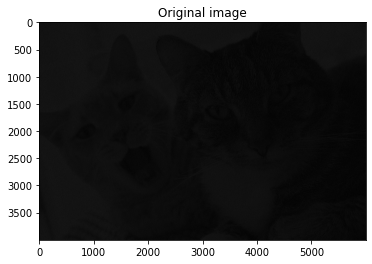

In [27]:
#make sure the image and the jupyter file in the same path
#you can read other images by typing the correct path and image name
image = cv2.imread('cat.png', cv2.IMREAD_GRAYSCALE) 
p.title('Original image')
p.imshow(image, cmap = 'gray', vmin = 0, vmax = 255)

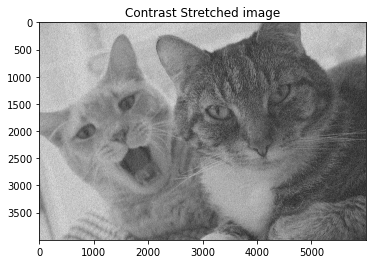

In [28]:
p.title('Contrast Stretched image')
c = np.min(image)
d = np.max(image)
new_img = (image - c) * (255/(d - c))
p.imshow(new_img, cmap = 'gray', vmin = 0, vmax = 255)

Q2.1

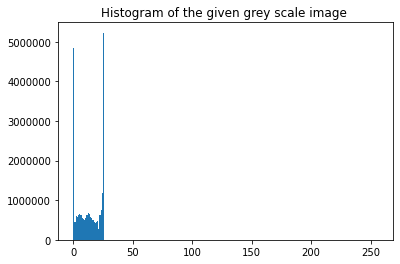

In [29]:
pixels = image.ravel()
bins = 256
x = [0, 256]
p.ticklabel_format(style = 'plain')
p.title('Histogram of the given grey scale image ')
p.hist(pixels, bins, (0,256))
p.show()

Q2.2

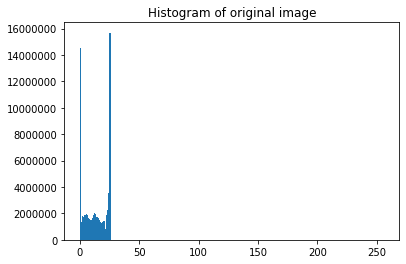

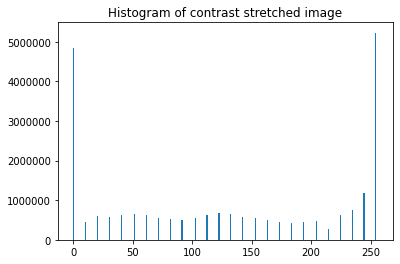

In [31]:
img = cv2.imread('cat.png')
pixels = img.ravel()
p.ticklabel_format(style = 'plain')
p.title('Histogram of original image')
p.hist(pixels, bins, (0,256))
p.show()

pixels = new_img.ravel()
p.ticklabel_format(style = 'plain')
p.title('Histogram of contrast stretched image')
p.hist(pixels, bins, (0,256))
p.show()

The calculated histogram for the contrast stretched image is close to the first simple the question given

Q3

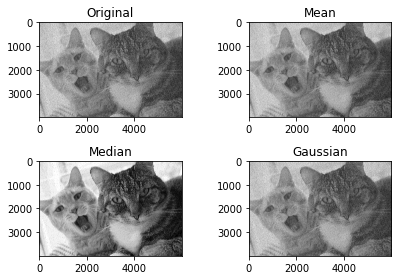

In [32]:
new_img = new_img.astype(np.uint8)
size = (5,5)
mean_img = cv2.blur(new_img, size)

med_img = cv2.medianBlur(new_img, 3)

gauss_size = (3,3)
gauss_img = cv2.GaussianBlur(new_img, gauss_size, cv2.BORDER_DEFAULT)


# ** make plots **
p.subplot(2,2,1)
p.title('Original')
p.imshow(new_img, cmap = 'gray', vmin = 0, vmax = 255)

p.subplot(2,2,2)
p.title('Mean')
p.imshow(mean_img, cmap = 'gray', vmin = 0, vmax = 255)

p.subplot(2,2,3)
p.title('Median')
p.imshow(med_img, cmap = 'gray', vmin = 0, vmax = 255)

p.subplot(2,2,4)
p.title('Gaussian')
p.imshow(gauss_img, cmap = 'gray', vmin = 0, vmax = 255)

p.tight_layout()
p.show()

Q4

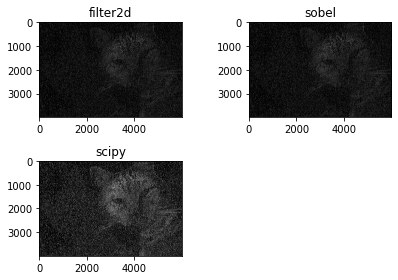

In [33]:
filter_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
    ])
filter_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
    ])

gradient_x = cv2.filter2D(med_img, -1, filter_x)
gradient_y = cv2.filter2D(med_img, -1, filter_y)
gradient = cv2.addWeighted(cv2.convertScaleAbs(gradient_x), 0.5, cv2.convertScaleAbs(gradient_y), 0.5, 0)
p.subplot(2,2,1)
p.title('filter2d')
p.imshow(gradient.astype(np.uint8), cmap='gray', vmin=0, vmax=255)

#the code below is for testing
#this is sobel
sobel_grad_x = cv2.Sobel(med_img,-1, 1, 0, ksize=3,\
               scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
sobel_grad_y = cv2.Sobel(med_img,-1, 0, 1, ksize=3,\
               scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

p.subplot(2,2,2)
p.title('sobel')
gradient = cv2.addWeighted(cv2.convertScaleAbs(sobel_grad_x), 0.5, cv2.convertScaleAbs(sobel_grad_y), 0.5, 0)
p.imshow((gradient).astype(np.uint8), cmap='gray', vmin=0, vmax=255)

#This is the scipy.signal.convolve2d

p.subplot(2,2,3)
p.title('scipy')
x = signal.convolve2d(med_img, filter_x, boundary='symm', mode='same')
y = signal.convolve2d(med_img, filter_y, boundary='symm', mode='same')
gradient = cv2.addWeighted(cv2.convertScaleAbs(x), 0.5, cv2.convertScaleAbs(y), 0.5, 0)
p.imshow((gradient).astype(np.uint8), cmap='gray', vmin=0, vmax=255)

p.tight_layout()
p.show()